In [8]:
LIVER_DATASET_PATH = "liver_paxdb_dataset.csv"
GTEX_TRANSCRIPT_PATH = "/Users/alvinthosatria/Documents/FYP/FYP/GTEx/GTEx_Analysis_v10_RSEMv1.3.3_transcripts_tpm.txt.gz"

# Extract Liver Sample IDs

In [9]:
import pandas as pd

metadata_file = "/Users/alvinthosatria/Documents/FYP/FYP/GTEx/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt"
sample_info = pd.read_csv(metadata_file, sep="\t")
liver_samples = sample_info[sample_info["SMTSD"] == "Liver"]["SAMPID"].tolist()
liver_samples

/var/folders/gf/h3mltqr96tbg9fb8qrczpfd80000gn/T/ipykernel_24416/1268756411.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_info = pd.read_csv(metadata_file, sep="\t")


['GTEX-111FC-1226-SM-GL4OA',
 'GTEX-111FC-1226-SM-HAV27',
 'GTEX-1192X-1026-SM-5H12P',
 'GTEX-1192X-1026-SM-GLDRX',
 'GTEX-11DXY-0526-SM-5EGGQ',
 'GTEX-11DXY-0526-SM-EAQ9I',
 'GTEX-11DXZ-0126-SM-5EGGY',
 'GTEX-11DXZ-0126-SM-EAIMN',
 'GTEX-11EMC-0326-SM-GLDS2',
 'GTEX-11EMC-0326-SM-HAV2K',
 'GTEX-11EQ9-0526-SM-5A5JZ',
 'GTEX-11GSP-0626-SM-5986T',
 'GTEX-11GSP-0626-SM-EB7J9',
 'GTEX-11NUK-1226-SM-5P9GM',
 'GTEX-11NUK-1226-SM-EB7JF',
 'GTEX-11NV4-1326-SM-5HL6V',
 'GTEX-11NV4-1326-SM-EAVOU',
 'GTEX-11OF3-0726-SM-5BC4Z',
 'GTEX-11OF3-0726-SM-EUZBA',
 'GTEX-11TT1-1726-SM-5EQLJ',
 'GTEX-11TT1-1726-SM-EB7HG',
 'GTEX-11TUW-1726-SM-5BC5C',
 'GTEX-11TUW-1726-SM-EB7IF',
 'GTEX-11UD2-1626-SM-5EQM3',
 'GTEX-11UD2-1626-SM-GM5PB',
 'GTEX-11WQC-0726-SM-5EQMR',
 'GTEX-11WQC-0726-SM-EAVPO',
 'GTEX-11ZTS-1426-SM-5EQMM',
 'GTEX-11ZUS-2526-SM-59872',
 'GTEX-11ZUS-2526-SM-EB7EJ',
 'GTEX-11ZVC-0726-SM-5FQT9',
 'GTEX-1212Z-0226-SM-59HLF',
 'GTEX-1212Z-0226-SM-EAYYA',
 'GTEX-12696-0826-SM-5EGGE',
 'GTEX-12696-0

# Filter GTEx transcript TPM Data

In [ ]:
import pandas as pd

CHUNK_SIZE = 10000
results = []

first_chunk = pd.read_csv(
    GTEX_TRANSCRIPT_PATH, sep="\t", compression="gzip", nrows=1
)

available_columns = first_chunk.columns.tolist()
print("Available columns in the data:", available_columns)
print("Requested liver samples:", liver_samples)

missing_columns = [col for col in liver_samples if col not in available_columns]
if missing_columns:
    print("Warning: The following columns are missing:", missing_columns)

valid_liver_samples = [col for col in liver_samples if col in available_columns]

if not valid_liver_samples:
    raise ValueError("No valid liver sample columns found in the data")

for chunk in pd.read_csv(
    GTEX_TRANSCRIPT_PATH,
    sep="\t",
    compression="gzip",
    chunksize=CHUNK_SIZE,
    usecols=["transcript_id", "gene_id"] + valid_liver_samples,
):

    try:
        chunk_liver = chunk[["transcript_id", "gene_id"] + valid_liver_samples]
        chunk_liver["median_TPM"] = chunk_liver.iloc[:, 2:].median(axis=1)

        chunk_result = chunk_liver[["transcript_id", "gene_id", "median_TPM"]]

        results.append(chunk_result)

    except Exception as e:
        print(f"Error processing chunk: {e}")
        continue

if results:
    final_result = pd.concat(results, ignore_index=True)
    final_result.to_csv("liver_transcript_tpm.csv", index=False)
else:
    print("No data was processed successfully")

Available columns in the data: ['transcript_id', 'gene_id', 'GTEX-1117F-0005-SM-HL9SH', 'GTEX-1117F-0011-R10b-SM-GI4VE', 'GTEX-1117F-0011-R11b-SM-GIN8R', 'GTEX-1117F-0011-R2b-SM-GI4VL', 'GTEX-1117F-0011-R3a-SM-GJ3PJ', 'GTEX-1117F-0011-R4b-SM-GI4VM', 'GTEX-1117F-0011-R5a-SM-GI4VW', 'GTEX-1117F-0011-R6a-SM-GI4VX', 'GTEX-1117F-0011-R7a-SM-H65ZK', 'GTEX-1117F-0226-SM-5GZZ7', 'GTEX-1117F-0426-SM-5EGHI', 'GTEX-1117F-0526-SM-5EGHJ', 'GTEX-1117F-0626-SM-5N9CS', 'GTEX-1117F-0726-SM-5GIEN', 'GTEX-1117F-1426-SM-H65ZH', 'GTEX-1117F-2126-SM-GIN9G', 'GTEX-1117F-2426-SM-5EGGH', 'GTEX-1117F-2526-SM-5GZY6', 'GTEX-1117F-2826-SM-5GZXL', 'GTEX-1117F-2926-SM-5GZYI', 'GTEX-1117F-3026-SM-5GZYU', 'GTEX-1117F-3226-SM-5N9CT', 'GTEX-111CU-0002-SM-HTQ8G', 'GTEX-111CU-0005-SM-GJ3PH', 'GTEX-111CU-0126-SM-5GZWZ', 'GTEX-111CU-0226-SM-5GZXC', 'GTEX-111CU-0326-SM-5GZXO', 'GTEX-111CU-0426-SM-5GZY1', 'GTEX-111CU-0526-SM-5EGHK', 'GTEX-111CU-0626-SM-5EGHL', 'GTEX-111CU-0726-SM-5GZYD', 'GTEX-111CU-0826-SM-5EGIJ', 'GTEX-111C

In [12]:
import pandas as pd

df = pd.read_csv(LIVER_DATASET_PATH)
df1 = pd.read_csv("/Users/alvinthosatria/Documents/FYP/datasets/liver_transcript_tpm.csv")
# df1 = pd.read_csv("/Users/alvinthosatria/Documents/FYP/datasets/lung_transcript_tpm.csv")
df

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance
0,ENSP00000251595,ENST00000251595,ENSG00000188536,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,6,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,576,11,1,ENST00000251595.11,13,20917.00000
1,ENSP00000322421,ENST00000320868,ENSG00000206172,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,5,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,577,9,1,ENST00000320868.9,8,20897.00000
2,ENSP00000333994,ENST00000335295,ENSG00000244734,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...,147,3,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGT...,628,4,1,ENST00000335295.4,4,16993.00000
3,ENSP00000295834,ENST00000295834,ENSG00000163586,MSFSGKYQLQSQENFEAFMKAIGLPEELIQKGKDIKGVSEIVQNGK...,127,3,GGCAGAGCCGCAGGTCAGTCGTGAAGAGGGAGCTCTATTGCCACCA...,ATGAGTTTCTCCGGCAAGTACCAACTGCAGAGCCAGGAAAACTTTG...,501,8,1,ENST00000295834.8,10,16604.00000
4,ENSP00000370010,ENST00000380636,ENSG00000205542,MSDKPDMAEIEKFDKSKLKKTETQEKNPLPSKETIEQEKQAGES,44,1,AACTCGGTGGTGGCCACTGCGCAGACCAGACTTCGCTCGTACTCGT...,ATGTCTGACAAACCCGATATGGCTGAGATCGAGAAATTCGATAAGT...,1702,1,0,ENST00000451311.7,11,11128.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15179,ENSP00000311528,ENST00000311268,ENSG00000250510,MARGGAGAEEASLRSNALSWLACGLLALLANAWIILSISAKQQKHK...,588,3,AGCCGGCAGGCAGCGGGAGCCCGAGAGAGCCGCGTCGGGAGTGCGG...,ATGGCTCGGGGCGGGGCGGGGGCAGAGGAGGCCTCCCTGCGCTCCA...,2495,8,1,ENST00000311268.8,8,0.00002
15180,ENSP00000349147,ENST00000356713,ENSG00000119946,MAAAAAAAAAVGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...,951,4,GCAGTATCACGTGCAGCTGCGCTGGGTGCAGGATGGCGGCGGCCGC...,ATGGCGGCGGCCGCGGCGGCGGCAGCAGCGGTGGGTGTCAGGCTCC...,5702,5,1,ENST00000356713.5,12,0.00002
15181,ENSP00000373952,ENST00000389301,ENSG00000187741,MSDSWVPNSASGQDPGGRRRAWAELLAGRVKREKYNPERAQKLKES...,1455,3,GAGCCGCCGCCGGGGCTGTAGGCGCCAAGGCCATGTCCGACTCGTG...,ATGTCCGACTCGTGGGTCCCGAACTCCGCCTCGGGCCAGGACCCAG...,5452,8,1,ENST00000389301.8,16,0.00002
15182,ENSP00000371398,ENST00000381971,ENSG00000107249,MNGRSCSMSLHRTSGTPQGPRMVSGHHIPAIRAHSGTPGPSPCGST...,930,3,ACACACATCCACACTCCTCGCCCGGCTGCCTTCCTCCCTCCCTCTT...,ATGAATGGAAGATCATGCAGCATGAGTCTCCACCGGACATCGGGAA...,7684,8,1,ENST00000381971.8,24,0.00002


In [13]:
import pandas as pd

def map_transcript_tpm(df, df1):
    df = df.copy()

    df['mrna_id'] = df['mrna_id'].astype(str)
    df['mrna_version'] = df['mrna_version'].astype(str)
    df['transcript_id'] = df['mrna_id'] + '.' + df['mrna_version']
    
    df1 = df1.copy()
    df1['transcript_id'] = df1['transcript_id'].astype(str)
    
    print(f"Number of transcripts in df: {len(df)}")
    print(f"Number of transcripts in df1: {len(df1)}")
    print(f"Unique transcript IDs in df: {df['transcript_id'].nunique()}")
    print(f"Unique transcript IDs in df1: {df1['transcript_id'].nunique()}")
    
    df_transcripts = set(df['transcript_id'])
    df1_transcripts = set(df1['transcript_id'])
    common_transcripts = df_transcripts.intersection(df1_transcripts)
    
    print(f"Number of common transcript IDs: {len(common_transcripts)}")

    merged_df = pd.merge(
        df,
        df1[['transcript_id', 'median_TPM']],
        on='transcript_id',
        how='left'  # Keep all entries from df, NaN for missing TPM values
    )
    
    result_df = merged_df.dropna(subset=['median_TPM'])
    
    print(f"Number of rows after merge (before dropping NaN): {len(merged_df)}")
    print(f"Number of rows after dropping missing TPM: {len(result_df)}")
    print(f"Number of rows dropped due to missing TPM: {len(merged_df) - len(result_df)}")
    
    result_df = result_df.drop('transcript_id', axis=1)
    
    assert result_df['median_TPM'].notna().all(), "Error: Some TPM values are still missing"
    
    return result_df

result_df = map_transcript_tpm(df, df1)
result_df

Number of transcripts in df: 15184
Number of transcripts in df1: 244939
Unique transcript IDs in df: 15184
Unique transcript IDs in df1: 244939
Number of common transcript IDs: 14936
Number of rows after merge (before dropping NaN): 15184
Number of rows after dropping missing TPM: 14936
Number of rows dropped due to missing TPM: 248


,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM
0,ENSP00000251595,ENST00000251595,ENSG00000188536,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,6,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,576,11,1,ENST00000251595.11,13,20917.00000,500.545
1,ENSP00000322421,ENST00000320868,ENSG00000206172,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,5,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,577,9,1,ENST00000320868.9,8,20897.00000,190.890
2,ENSP00000333994,ENST00000335295,ENSG00000244734,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...,147,3,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGT...,628,4,1,ENST00000335295.4,4,16993.00000,388.790
3,ENSP00000295834,ENST00000295834,ENSG00000163586,MSFSGKYQLQSQENFEAFMKAIGLPEELIQKGKDIKGVSEIVQNGK...,127,3,GGCAGAGCCGCAGGTCAGTCGTGAAGAGGGAGCTCTATTGCCACCA...,ATGAGTTTCTCCGGCAAGTACCAACTGCAGAGCCAGGAAAACTTTG...,501,8,1,ENST00000295834.8,10,16604.00000,2434.365
4,ENSP00000370010,ENST00000380636,ENSG00000205542,MSDKPDMAEIEKFDKSKLKKTETQEKNPLPSKETIEQEKQAGES,44,1,AACTCGGTGGTGGCCACTGCGCAGACCAGACTTCGCTCGTACTCGT...,ATGTCTGACAAACCCGATATGGCTGAGATCGAGAAATTCGATAAGT...,1702,1,0,ENST00000451311.7,11,11128.00000,2.945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15179,ENSP00000311528,ENST00000311268,ENSG00000250510,MARGGAGAEEASLRSNALSWLACGLLALLANAWIILSISAKQQKHK...,588,3,AGCCGGCAGGCAGCGGGAGCCCGAGAGAGCCGCGTCGGGAGTGCGG...,ATGGCTCGGGGCGGGGCGGGGGCAGAGGAGGCCTCCCTGCGCTCCA...,2495,8,1,ENST00000311268.8,8,0.00002,0.360
15180,ENSP00000349147,ENST00000356713,ENSG00000119946,MAAAAAAAAAVGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...,951,4,GCAGTATCACGTGCAGCTGCGCTGGGTGCAGGATGGCGGCGGCCGC...,ATGGCGGCGGCCGCGGCGGCGGCAGCAGCGGTGGGTGTCAGGCTCC...,5702,5,1,ENST00000356713.5,12,0.00002,0.050
15181,ENSP00000373952,ENST00000389301,ENSG00000187741,MSDSWVPNSASGQDPGGRRRAWAELLAGRVKREKYNPERAQKLKES...,1455,3,GAGCCGCCGCCGGGGCTGTAGGCGCCAAGGCCATGTCCGACTCGTG...,ATGTCCGACTCGTGGGTCCCGAACTCCGCCTCGGGCCAGGACCCAG...,5452,8,1,ENST00000389301.8,16,0.00002,0.515
15182,ENSP00000371398,ENST00000381971,ENSG00000107249,MNGRSCSMSLHRTSGTPQGPRMVSGHHIPAIRAHSGTPGPSPCGST...,930,3,ACACACATCCACACTCCTCGCCCGGCTGCCTTCCTCCCTCCCTCTT...,ATGAATGGAAGATCATGCAGCATGAGTCTCCACCGGACATCGGGAA...,7684,8,1,ENST00000381971.8,24,0.00002,0.000


In [14]:
result_df = result_df[result_df["median_TPM"] > 0]
result_df

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM
0,ENSP00000251595,ENST00000251595,ENSG00000188536,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,6,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,576,11,1,ENST00000251595.11,13,20917.00000,500.545
1,ENSP00000322421,ENST00000320868,ENSG00000206172,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,5,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,577,9,1,ENST00000320868.9,8,20897.00000,190.890
2,ENSP00000333994,ENST00000335295,ENSG00000244734,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...,147,3,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGT...,628,4,1,ENST00000335295.4,4,16993.00000,388.790
3,ENSP00000295834,ENST00000295834,ENSG00000163586,MSFSGKYQLQSQENFEAFMKAIGLPEELIQKGKDIKGVSEIVQNGK...,127,3,GGCAGAGCCGCAGGTCAGTCGTGAAGAGGGAGCTCTATTGCCACCA...,ATGAGTTTCTCCGGCAAGTACCAACTGCAGAGCCAGGAAAACTTTG...,501,8,1,ENST00000295834.8,10,16604.00000,2434.365
4,ENSP00000370010,ENST00000380636,ENSG00000205542,MSDKPDMAEIEKFDKSKLKKTETQEKNPLPSKETIEQEKQAGES,44,1,AACTCGGTGGTGGCCACTGCGCAGACCAGACTTCGCTCGTACTCGT...,ATGTCTGACAAACCCGATATGGCTGAGATCGAGAAATTCGATAAGT...,1702,1,0,ENST00000451311.7,11,11128.00000,2.945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15177,ENSP00000219069,ENST00000219069,ENSG00000006194,MASGPGSQEREGLLIVKLEEDCAWSQELPPPDPGPSPEASHLRFRR...,683,5,AACTTGCGCGCTGAGATTTCCGGCGTGGGAGCAGAGGTCTGAGTCT...,ATGGCGTCGGGCCCGGGCTCCCAGGAACGGGAAGGGCTCCTGATAG...,3282,6,1,ENST00000219069.6,11,0.00002,4.740
15178,ENSP00000475189,ENST00000606888,ENSG00000272031,MLHTEGHALLRAVGQGKLRLARLLLEGGAYVNEGDAQGETALMAAC...,496,1,ACGCCCGGAACCGAAGCTTGCGAAGCGGGTCGCAGAGAGAGATGGG...,ATGTTGCACACCGAGGGCCACGCTCTTCTTCGGGCGGTGGGTCAGG...,3607,3,1,ENST00000606888.3,3,0.00002,0.190
15179,ENSP00000311528,ENST00000311268,ENSG00000250510,MARGGAGAEEASLRSNALSWLACGLLALLANAWIILSISAKQQKHK...,588,3,AGCCGGCAGGCAGCGGGAGCCCGAGAGAGCCGCGTCGGGAGTGCGG...,ATGGCTCGGGGCGGGGCGGGGGCAGAGGAGGCCTCCCTGCGCTCCA...,2495,8,1,ENST00000311268.8,8,0.00002,0.360
15180,ENSP00000349147,ENST00000356713,ENSG00000119946,MAAAAAAAAAVGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...,951,4,GCAGTATCACGTGCAGCTGCGCTGGGTGCAGGATGGCGGCGGCCGC...,ATGGCGGCGGCCGCGGCGGCGGCAGCAGCGGTGGGTGTCAGGCTCC...,5702,5,1,ENST00000356713.5,12,0.00002,0.050


## Clean data

### Filtering conditions

1. Is canonical
2. Drop duplicate protein sequence
3. Use most updated mRNA sequence version

In [15]:
filtered_data = result_df.drop(result_df[result_df["is_canonical"] == 0].index)
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM
0,ENSP00000251595,ENST00000251595,ENSG00000188536,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,6,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,576,11,1,ENST00000251595.11,13,20917.00000,500.545
1,ENSP00000322421,ENST00000320868,ENSG00000206172,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,142,5,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...,ATGGTGCTGTCTCCTGCCGACAAGACCAACGTCAAGGCCGCCTGGG...,577,9,1,ENST00000320868.9,8,20897.00000,190.890
2,ENSP00000333994,ENST00000335295,ENSG00000244734,MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESF...,147,3,ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGA...,ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGT...,628,4,1,ENST00000335295.4,4,16993.00000,388.790
3,ENSP00000295834,ENST00000295834,ENSG00000163586,MSFSGKYQLQSQENFEAFMKAIGLPEELIQKGKDIKGVSEIVQNGK...,127,3,GGCAGAGCCGCAGGTCAGTCGTGAAGAGGGAGCTCTATTGCCACCA...,ATGAGTTTCTCCGGCAAGTACCAACTGCAGAGCCAGGAAAACTTTG...,501,8,1,ENST00000295834.8,10,16604.00000,2434.365
5,ENSP00000295897,ENST00000295897,ENSG00000163631,MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...,609,4,CTAGCTTTTCTCTTCTGTCAACCCCACACGCCTTTGGCACAATGAA...,ATGAAGTGGGTAACCTTTATTTCCCTTCTTTTTCTCTTTAGCTCGG...,2285,9,1,ENST00000295897.9,19,9525.00000,2577.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15177,ENSP00000219069,ENST00000219069,ENSG00000006194,MASGPGSQEREGLLIVKLEEDCAWSQELPPPDPGPSPEASHLRFRR...,683,5,AACTTGCGCGCTGAGATTTCCGGCGTGGGAGCAGAGGTCTGAGTCT...,ATGGCGTCGGGCCCGGGCTCCCAGGAACGGGAAGGGCTCCTGATAG...,3282,6,1,ENST00000219069.6,11,0.00002,4.740
15178,ENSP00000475189,ENST00000606888,ENSG00000272031,MLHTEGHALLRAVGQGKLRLARLLLEGGAYVNEGDAQGETALMAAC...,496,1,ACGCCCGGAACCGAAGCTTGCGAAGCGGGTCGCAGAGAGAGATGGG...,ATGTTGCACACCGAGGGCCACGCTCTTCTTCGGGCGGTGGGTCAGG...,3607,3,1,ENST00000606888.3,3,0.00002,0.190
15179,ENSP00000311528,ENST00000311268,ENSG00000250510,MARGGAGAEEASLRSNALSWLACGLLALLANAWIILSISAKQQKHK...,588,3,AGCCGGCAGGCAGCGGGAGCCCGAGAGAGCCGCGTCGGGAGTGCGG...,ATGGCTCGGGGCGGGGCGGGGGCAGAGGAGGCCTCCCTGCGCTCCA...,2495,8,1,ENST00000311268.8,8,0.00002,0.360
15180,ENSP00000349147,ENST00000356713,ENSG00000119946,MAAAAAAAAAVGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...,951,4,GCAGTATCACGTGCAGCTGCGCTGGGTGCAGGATGGCGGCGGCCGC...,ATGGCGGCGGCCGCGGCGGCGGCAGCAGCGGTGGGTGTCAGGCTCC...,5702,5,1,ENST00000356713.5,12,0.00002,0.050


In [16]:
filtered_data = filtered_data.sort_values("mrna_version", ascending=False).drop_duplicates(
    subset=["protein_sequence"], keep="first"
)

filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM
12332,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,4,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,9,1,ENST00000341156.9,14,0.068,0.100
2052,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,4,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,9,1,ENST00000290765.9,11,57.000,11.385
6645,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,4,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,9,1,ENST00000256996.9,12,2.510,3.740
6651,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,4,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,9,1,ENST00000262990.9,11,2.500,13.445
2039,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,3,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,9,1,ENST00000302764.9,12,57.600,1.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,1,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,1,1,ENST00000372523.1,5,0.030,2.750
11750,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,1,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,1,1,ENST00000539033.1,1,0.102,0.110
3227,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,1,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,1,1,ENST00000621281.1,4,21.600,0.220
10842,ENSP00000436376,ENST00000529803,ENSG00000254550,MAEDRPQQPQLDMPLVLDQGLTRQMRLRVESLKQRGEKRQDGEKLL...,163,1,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,492,1,1,ENST00000529803.1,1,0.198,0.410


In [17]:
print(filtered_data.isnull().values.any())
print(filtered_data.isna().values.any())

False
False


# Compute Ratio

In [18]:
filtered_data["protein_per_transcript"] = (
    filtered_data["protein_abundance"] / filtered_data["median_TPM"]
)
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM,protein_per_transcript
12332,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,4,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,9,1,ENST00000341156.9,14,0.068,0.100,0.680000
2052,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,4,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,9,1,ENST00000290765.9,11,57.000,11.385,5.006588
6645,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,4,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,9,1,ENST00000256996.9,12,2.510,3.740,0.671123
6651,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,4,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,9,1,ENST00000262990.9,11,2.500,13.445,0.185943
2039,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,3,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,9,1,ENST00000302764.9,12,57.600,1.980,29.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,1,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,1,1,ENST00000372523.1,5,0.030,2.750,0.010909
11750,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,1,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,1,1,ENST00000539033.1,1,0.102,0.110,0.927273
3227,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,1,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,1,1,ENST00000621281.1,4,21.600,0.220,98.181818
10842,ENSP00000436376,ENST00000529803,ENSG00000254550,MAEDRPQQPQLDMPLVLDQGLTRQMRLRVESLKQRGEKRQDGEKLL...,163,1,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,492,1,1,ENST00000529803.1,1,0.198,0.410,0.482927


# Extract 5' UTR and 3' UTR

In [19]:
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM,protein_per_transcript
12332,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,4,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,9,1,ENST00000341156.9,14,0.068,0.100,0.680000
2052,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,4,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,9,1,ENST00000290765.9,11,57.000,11.385,5.006588
6645,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,4,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,9,1,ENST00000256996.9,12,2.510,3.740,0.671123
6651,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,4,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,9,1,ENST00000262990.9,11,2.500,13.445,0.185943
2039,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,3,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,9,1,ENST00000302764.9,12,57.600,1.980,29.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,1,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,1,1,ENST00000372523.1,5,0.030,2.750,0.010909
11750,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,1,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,1,1,ENST00000539033.1,1,0.102,0.110,0.927273
3227,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,1,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,1,1,ENST00000621281.1,4,21.600,0.220,98.181818
10842,ENSP00000436376,ENST00000529803,ENSG00000254550,MAEDRPQQPQLDMPLVLDQGLTRQMRLRVESLKQRGEKRQDGEKLL...,163,1,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,492,1,1,ENST00000529803.1,1,0.198,0.410,0.482927


In [20]:
import pandas as pd
import numpy as np

def get_5utr(row):
    cdna = row["cdna"]
    cds = row["cds"]

    cds_start_pos = cdna.find(cds)

    if cds_start_pos >= 0:
        return cdna[:cds_start_pos]
    else:
        return np.nan

def get_3utr(row):
    cdna = row["cdna"]
    cds = row["cds"]

    cds_start_pos = cdna.find(cds)

    if cds_start_pos >= 0:
        cds_end_pos = cds_start_pos + len(cds)
        return cdna[cds_end_pos:]
    else:
        return np.nan


filtered_data["5utr"] = filtered_data.apply(get_5utr, axis=1)
filtered_data["3utr"] = filtered_data.apply(get_3utr, axis=1)

filtered_data = filtered_data.dropna(subset=['5utr', '3utr'])
filtered_data["5utr_length"] = filtered_data["5utr"].apply(len)
filtered_data["3utr_length"] = filtered_data["3utr"].apply(len)
filtered_data

/var/folders/gf/h3mltqr96tbg9fb8qrczpfd80000gn/T/ipykernel_24416/1292947035.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["5utr_length"] = filtered_data["5utr"].apply(len)
/var/folders/gf/h3mltqr96tbg9fb8qrczpfd80000gn/T/ipykernel_24416/1292947035.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["3utr_length"] = filtered_data["3utr"].apply(len)


,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM,protein_per_transcript,5utr,3utr,5utr_length,3utr_length
12332,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,4,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,9,1,ENST00000341156.9,14,0.068,0.100,0.680000,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,431,3335
2052,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,4,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,9,1,ENST00000290765.9,11,57.000,11.385,5.006588,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,64,309
6645,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,4,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,9,1,ENST00000256996.9,12,2.510,3.740,0.671123,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,163,368
6651,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,4,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,9,1,ENST00000262990.9,11,2.500,13.445,0.185943,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,220,708
2039,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,3,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,9,1,ENST00000302764.9,12,57.600,1.980,29.090909,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,CTGCTTTTTTTCCTGCATTCTGTGGATCCTAGCAGATATTGCCAAC...,52,7441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13514,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,1,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,1,1,ENST00000372523.1,5,0.030,2.750,0.010909,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,95,1216
11750,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,1,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,1,1,ENST00000539033.1,1,0.102,0.110,0.927273,CACACAGCTGCAGAG,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,15,260
3227,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,1,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,1,1,ENST00000621281.1,4,21.600,0.220,98.181818,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,GATTCTTCTCAGTTTGAAAGACAATGAAAAATGGTTTTGTATGACT...,135,141
10842,ENSP00000436376,ENST00000529803,ENSG00000254550,MAEDRPQQPQLDMPLVLDQGLTRQMRLRVESLKQRGEKRQDGEKLL...,163,1,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,ATGGCGGAGGACAGGCCGCAGCAGCCGCAGCTGGACATGCCGCTGG...,492,1,1,ENST00000529803.1,1,0.198,0.410,0.482927,,,0,0


# Remove equal CDS and CDNA

In [21]:
filtered_data = filtered_data.drop(filtered_data[filtered_data["cds"] == filtered_data["cdna"]].index)
filtered_data = filtered_data.reset_index()
filtered_data = filtered_data.drop("index", axis=1)
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,protein_version,cdna,cds,mrna_length,mrna_version,is_canonical,canonical_transcript,gene_version,protein_abundance,median_TPM,protein_per_transcript,5utr,3utr,5utr_length,3utr_length
0,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,4,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,9,1,ENST00000341156.9,14,0.068,0.100,0.680000,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,431,3335
1,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,4,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,9,1,ENST00000290765.9,11,57.000,11.385,5.006588,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,64,309
2,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,4,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,9,1,ENST00000256996.9,12,2.510,3.740,0.671123,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,163,368
3,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,4,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,9,1,ENST00000262990.9,11,2.500,13.445,0.185943,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,220,708
4,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,3,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,9,1,ENST00000302764.9,12,57.600,1.980,29.090909,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,CTGCTTTTTTTCCTGCATTCTGTGGATCCTAGCAGATATTGCCAAC...,52,7441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,ENSP00000334805,ENST00000335017,ENSG00000187166,MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...,255,1,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,ATGGAACAGGCCTTGACTGGTGAGGCCCAAAGCCGGTGGCCCCGCA...,1300,1,1,ENST00000335017.1,1,3.320,0.030,110.666667,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,CCAACGCGGGCTAAAACCGACCGGACATCTAGCGGGCAGGGGAAGA...,312,220
9325,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,1,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,1,1,ENST00000372523.1,5,0.030,2.750,0.010909,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,95,1216
9326,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,1,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,1,1,ENST00000539033.1,1,0.102,0.110,0.927273,CACACAGCTGCAGAG,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,15,260
9327,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,1,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,1,1,ENST00000621281.1,4,21.600,0.220,98.181818,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,GATTCTTCTCAGTTTGAAAGACAATGAAAAATGGTTTTGTATGACT...,135,141


# Remove unecessary columns

In [22]:
filtered_data = filtered_data.drop(
    [
        "protein_version",
        "mrna_version",
        "is_canonical",
        "canonical_transcript",
        "gene_version",
    ],
    axis=1,
)
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,cdna,cds,mrna_length,protein_abundance,median_TPM,protein_per_transcript,5utr,3utr,5utr_length,3utr_length
0,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,5368,0.068,0.100,0.680000,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,431,3335
1,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,1108,57.000,11.385,5.006588,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,64,309
2,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,1815,2.510,3.740,0.671123,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,163,368
3,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,1891,2.500,13.445,0.185943,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,220,708
4,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,7967,57.600,1.980,29.090909,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,CTGCTTTTTTTCCTGCATTCTGTGGATCCTAGCAGATATTGCCAAC...,52,7441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,ENSP00000334805,ENST00000335017,ENSG00000187166,MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...,255,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,ATGGAACAGGCCTTGACTGGTGAGGCCCAAAGCCGGTGGCCCCGCA...,1300,3.320,0.030,110.666667,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,CCAACGCGGGCTAAAACCGACCGGACATCTAGCGGGCAGGGGAAGA...,312,220
9325,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,2769,0.030,2.750,0.010909,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,95,1216
9326,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,998,0.102,0.110,0.927273,CACACAGCTGCAGAG,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,15,260
9327,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,609,21.600,0.220,98.181818,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,GATTCTTCTCAGTTTGAAAGACAATGAAAAATGGTTTTGTATGACT...,135,141


In [23]:
filtered_data.columns

Index(['protein_id', 'mrna_id', 'gene_id', 'protein_sequence',
       'protein_length', 'cdna', 'cds', 'mrna_length', 'protein_abundance',
       'median_TPM', 'protein_per_transcript', '5utr', '3utr', '5utr_length',
       '3utr_length'],
      dtype='object')

# Re-order column

In [24]:
filtered_data["cds_length"] = filtered_data["cds"].apply(len)
filtered_data["cdna_length"] = filtered_data["cdna"].apply(len)

In [25]:
cols = list(filtered_data.columns.values)
filtered_data = filtered_data[
    [
        "protein_id",
        "mrna_id",
        "gene_id",
        "protein_sequence",
        "protein_length",
        "cdna",
        "5utr",
        "cds",
        "3utr",
        "cdna_length",
        "5utr_length",
        "cds_length",
        "3utr_length",
        "protein_abundance",
        "median_TPM",
        "protein_per_transcript"
    ]
]

filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,cdna,5utr,cds,3utr,cdna_length,5utr_length,cds_length,3utr_length,protein_abundance,median_TPM,protein_per_transcript
0,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,5368,431,1602,3335,0.068,0.100,0.680000
1,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,1108,64,735,309,57.000,11.385,5.006588
2,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,1815,163,1284,368,2.510,3.740,0.671123
3,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,1891,220,963,708,2.500,13.445,0.185943
4,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,CTGCTTTTTTTCCTGCATTCTGTGGATCCTAGCAGATATTGCCAAC...,7967,52,474,7441,57.600,1.980,29.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,ENSP00000334805,ENST00000335017,ENSG00000187166,MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...,255,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,ATGGAACAGGCCTTGACTGGTGAGGCCCAAAGCCGGTGGCCCCGCA...,CCAACGCGGGCTAAAACCGACCGGACATCTAGCGGGCAGGGGAAGA...,1300,312,768,220,3.320,0.030,110.666667
9325,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,2769,95,1458,1216,0.030,2.750,0.010909
9326,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,CACACAGCTGCAGAG,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,998,15,723,260,0.102,0.110,0.927273
9327,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,GATTCTTCTCAGTTTGAAAGACAATGAAAAATGGTTTTGTATGACT...,609,135,333,141,21.600,0.220,98.181818


In [26]:
filtered_data = filtered_data.dropna()
filtered_data

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,cdna,5utr,cds,3utr,cdna_length,5utr_length,cds_length,3utr_length,protein_abundance,median_TPM,protein_per_transcript
0,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,5368,431,1602,3335,0.068,0.100,0.680000
1,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,1108,64,735,309,57.000,11.385,5.006588
2,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,1815,163,1284,368,2.510,3.740,0.671123
3,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,1891,220,963,708,2.500,13.445,0.185943
4,ENSP00000304854,ENST00000302764,ENSG00000170584,MSAPFEERSGVVPCGTPWGQWYQTLEEVFIEVQVPPGTRAQDIQCG...,157,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,GCGCGTGCGCTCGGCTCCGCCTGGTGCGGCCGCGGCCGGGAGGGAC...,ATGTCGGCCCCGTTTGAGGAGCGGAGTGGGGTGGTACCGTGCGGGA...,CTGCTTTTTTTCCTGCATTCTGTGGATCCTAGCAGATATTGCCAAC...,7967,52,474,7441,57.600,1.980,29.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,ENSP00000334805,ENST00000335017,ENSG00000187166,MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...,255,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,TAAGGAACTGTGGGTAGATGGTTTGCAGGACCACATACACACACAA...,ATGGAACAGGCCTTGACTGGTGAGGCCCAAAGCCGGTGGCCCCGCA...,CCAACGCGGGCTAAAACCGACCGGACATCTAGCGGGCAGGGGAAGA...,1300,312,768,220,3.320,0.030,110.666667
9325,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,2769,95,1458,1216,0.030,2.750,0.010909
9326,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,CACACAGCTGCAGAG,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,998,15,723,260,0.102,0.110,0.927273
9327,ENSP00000479064,ENST00000621281,ENSG00000274944,MVCFSDLPKLRKAADSKREQFRRYLEKSGVLDTLTKVLVALYEEPE...,110,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,TAAGCAGAAAGGGACATGGATTTTAGTTGATGGATGACTCACTCAC...,ATGGTTTGCTTCTCAGATTTACCTAAACTAAGAAAGGCCGCCGACT...,GATTCTTCTCAGTTTGAAAGACAATGAAAAATGGTTTTGTATGACT...,609,135,333,141,21.600,0.220,98.181818


# Remove Outliers

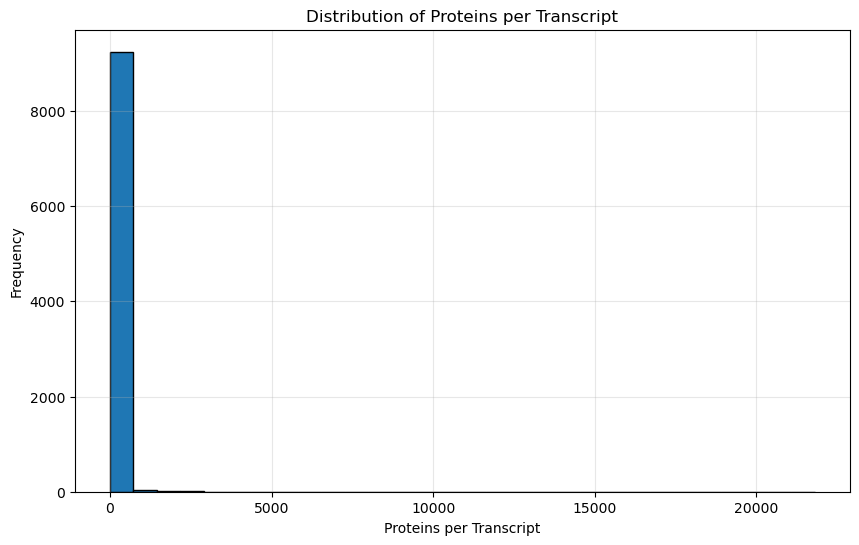

In [27]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data["protein_per_transcript"], bins=30, edgecolor="black")
plt.title("Distribution of Proteins per Transcript")
plt.xlabel("Proteins per Transcript")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

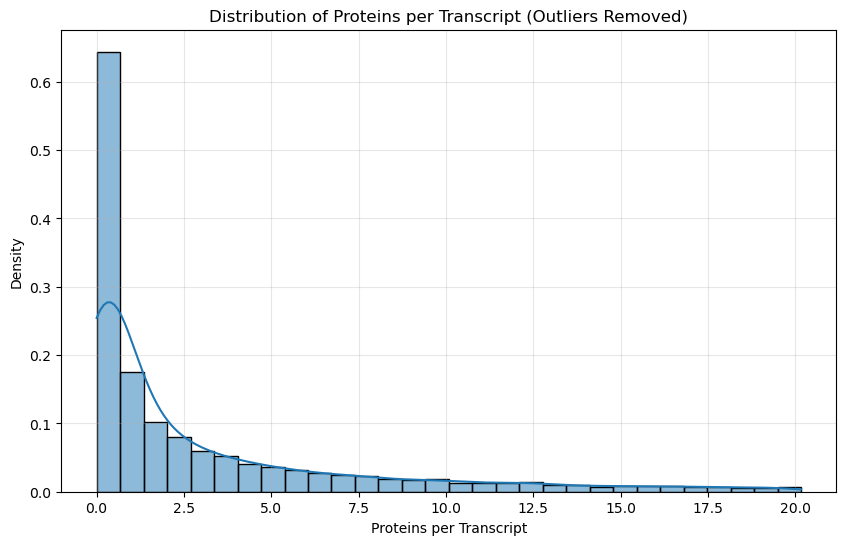

,protein_id,mrna_id,gene_id,protein_sequence,protein_length,cdna,5utr,cds,3utr,cdna_length,5utr_length,cds_length,3utr_length,protein_abundance,median_TPM,protein_per_transcript
0,ENSP00000341562,ENST00000341156,ENSG00000135454,MWLGRRALCALVLLLACASLGLLYASTRDAPGLRLPLAPWAPPQSP...,533,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,GCATTCCCCGCGCGGAGCCGAAGCAGCCGCAACGAGCCGGGAGCTG...,ATGTGGCTGGGCCGCCGGGCCCTGTGCGCTCTGGTCCTTCTGCTCG...,TGGCCCGCTGGGGATTTCTGACTGTCAGGCTGGGCCTGCCTCCTTG...,5368,431,1602,3335,0.068,0.100,0.680000
1,ENSP00000290765,ENST00000290765,ENSG00000133433,MGLELFLDLVSQPSRAVYIFAKKNGIPLELRTVDLVKGQHKSKEFL...,244,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,AGCTGCTGCCCACACCGCGCTCAGCGCCTTCACTGCCATCCCCGCT...,ATGGGCCTAGAGCTGTTTCTTGACCTGGTGTCCCAGCCCAGCCGCG...,AGGGTCTGGGATGGGGGCCAGGAGATTAGCAACAAGGATTCATTCT...,1108,64,735,309,57.000,11.385,5.006588
2,ENSP00000256996,ENST00000256996,ENSG00000134574,MAPKKRPETQKTSEIVLRPRNKRSRSPLELEPEAKKLCAKGSGPSR...,427,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,GGTTTGAACAAGCCCTGGGCATGTTTGGCGGGAAGTTGGCTTAGCT...,ATGGCTCCCAAGAAACGCCCAGAAACCCAGAAGACCTCCGAGATTG...,GAGACACTAAAGAAGGTGTGGGCCAGACAAGGCCTTGGAGCCCACA...,1815,163,1284,368,2.510,3.740,0.671123
3,ENSP00000262990,ENST00000262990,ENSG00000109445,MPKKKTGARKKAENRREREKQLRASRSTIDLAKHPCNASMECDKCQ...,320,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,GCTGTCGTAAAAGGACGTCCGGTCCGTCTCCTAGTGTCCGGAATCG...,ATGCCTAAAAAAAAGACTGGTGCGAGGAAGAAGGCTGAGAACCGCC...,GGGAGCTGCTCTGGTGGCCGTGTGTGAGAGGAGCAGGAGTGAGTGT...,1891,220,963,708,2.500,13.445,0.185943
5,ENSP00000371811,ENST00000382374,ENSG00000165487,MAAAAGSCARVAAWGGKLRRGLAVSRQAVRSPGPLAAAVAGAALAG...,434,GCCTAGCTGCGCTTCCGCAAAGATGGCGGCGGCTGCGGGTAGCTGC...,GCCTAGCTGCGCTTCCGCAAAG,ATGGCGGCGGCTGCGGGTAGCTGCGCGCGGGTGGCGGCCTGGGGCG...,TAAAAGATATAATAGTATGGCAATTATATTGTTCCAAATGTCAAAA...,1885,22,1305,558,2.500,8.060,0.310174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,ENSP00000464383,ENST00000498285,ENSG00000263620,MSATAATAPPAAPAGEGGPPAPPPNLTSNRRLQQTQAQVDEVVDIM...,121,ATCTTTCCGTCCCGGGCAGCCAGCGCCAGTCGGAGCCAGCGCGAGC...,ATCTTTCCGTCCCGGGCAGCCAGCGCCAGTCGGAGCCAGCGCGAGC...,ATGTCTGCTACCGCTGCCACGGCCCCCCCTGCTGCCCCGGCTGGGG...,,460,96,364,0,42.400,2.400,17.666667
9323,ENSP00000477037,ENST00000553909,ENSG00000259171,MVMGLGVLLLVFVLGLGLTPPTLAQDNSRHL,31,ACACACTCACACAAGGACGCCAACCCCACCTAGATGCAAAGCAGGA...,ACACACTCACACAAGGACGCCAACCCCACCTAGATGCAAAGCAGGA...,ATGGTGATGGGCCTGGGCGTTTTGTTGTTGGTCTTCGTGCTGGGTC...,GATACTGATGGCTCTGCAGAGGACCCATTCATTGCTTCTGCTTTTG...,1498,190,96,1212,0.591,24.155,0.024467
9325,ENSP00000361601,ENST00000372523,ENSG00000168612,MLERLKAPWSAALQRKYFDLGIWTAPISPMALTMLNGLLIKDSSPP...,485,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,AAATAGGGAGAAATGGCGACGGAGCCTGGCTGTGGGCCCATCTTTG...,ATGCTTGAGAGACTCAAAGCCCCGTGGTCAGCTGCCCTGCAAAGAA...,TTATTCTCGATGCCCAGAGATGCTCATGCACCTGTGCACACTCACA...,2769,95,1458,1216,0.030,2.750,0.010909
9326,ENSP00000437563,ENST00000539033,ENSG00000255641,MNKQRGTFSEVSLAQDPKRQQRKPKGNKSSISGTEQEIFQVELNLQ...,240,CACACAGCTGCAGAGATGAATAAACAAAGAGGAACCTTCTCAGAAG...,CACACAGCTGCAGAG,ATGAATAAACAAAGAGGAACCTTCTCAGAAGTGAGTCTGGCCCAGG...,GCTCAAGAAATCAACACATCTTGGCCTCCCAAGTTGCTGGGATTAC...,998,15,723,260,0.102,0.110,0.927273


In [ ]:
import seaborn as sns

Q1 = filtered_data["protein_per_transcript"].quantile(0.25)
Q3 = filtered_data["protein_per_transcript"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = filtered_data[
    (filtered_data["protein_per_transcript"] >= lower_bound)
    & (filtered_data["protein_per_transcript"] <= upper_bound)
]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_filtered, x="protein_per_transcript", bins=30, kde=True, stat="density"
)
plt.title("Distribution of Proteins per Transcript (Outliers Removed)")
plt.xlabel("Proteins per Transcript")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

df_filtered

# Liver

In [ ]:
df_filtered.to_csv("/Users/alvinthosatria/Documents/FYP/datasets/cleaned_liver_data.csv", index=False)
df_filtered = pd.read_csv("/Users/alvinthosatria/Documents/FYP/datasets/cleaned_liver_data.csv")
df_filtered = df_filtered.dropna()
df_filtered.to_csv("/Users/alvinthosatria/Documents/FYP/datasets/cleaned_liver_data.csv", index=False)